In [20]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import math
import pandas as pd

In [2]:
import mplhep as hep
plt.style.use(hep.style.CMS)

In [5]:
df = pd.read_csv("../windows_limits.csv", sep=";")

In [37]:
df

,eta1,eta2,deta_low,deta_high,dphi_low,dphi_high,eta_bin,theta1,theta12,theta2
0,0.0,0.2,-0.075,0.075,-0.60,0.60,0.1,2.305911,2.305911,2.305911
1,0.2,0.4,-0.075,0.075,-0.60,0.60,0.3,1.622648,1.622648,1.622648
2,0.4,0.6,-0.075,0.100,-0.60,0.60,0.5,1.233358,1.233358,1.233358
3,0.6,0.8,-0.075,0.100,-0.60,0.60,0.7,0.967718,0.967718,0.967718
4,0.8,1.0,-0.075,0.125,-0.60,0.60,0.9,0.771937,0.771937,0.771937
5,1.0,1.2,-0.075,0.175,-0.60,0.60,1.1,0.621665,0.621665,0.621665
6,1.2,1.4,-0.075,0.200,-0.60,0.60,1.3,0.503572,0.503572,0.503572
7,1.4,1.6,-0.075,0.200,-0.60,0.60,1.5,0.409418,0.409418,0.409418
8,1.6,1.8,-0.075,0.200,-0.60,0.60,1.7,0.333659,0.333659,0.333659
9,1.8,2.0,-0.075,0.150,-0.60,0.60,1.9,0.272341,0.272341,0.272341


In [12]:
df["eta_bin"] = (df.eta2 + df.eta1) / 2

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

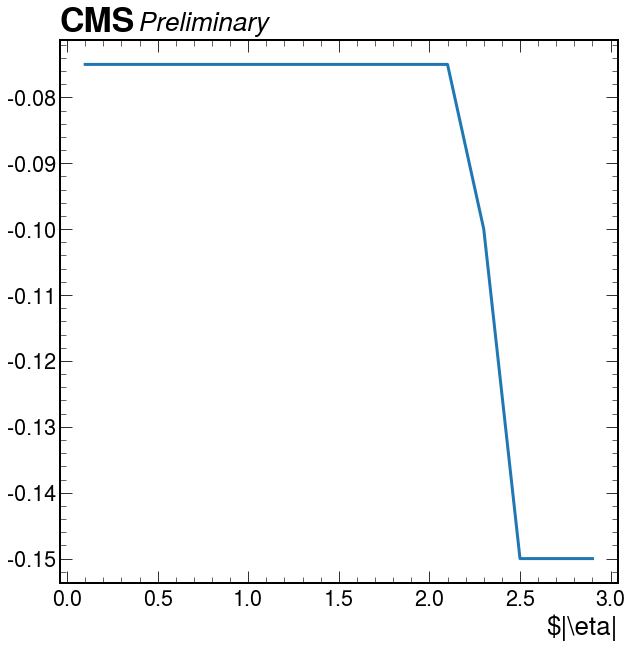

In [121]:
plt.plot(df.eta_bin, df.deta_low, linewidth=3)
plt.xlabel("$|\Delta\eta|$ low")
plt.xlabel("$|\eta|")
hep.cms.text("Preliminary ",loc=0)


In [29]:
df.eta1.values

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8])

In [35]:
df["theta2"] = 2 * np.arctanh(np.exp(- df.eta2.values))

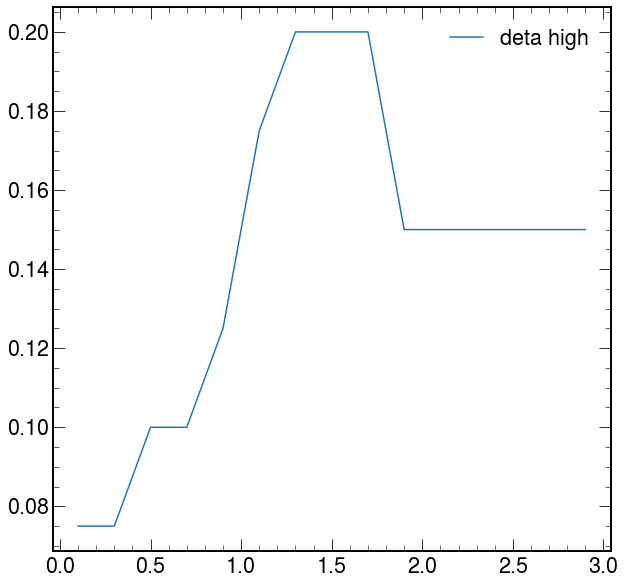

In [38]:
plt.plot(df.eta_bin, df.deta_high, label="deta high")
plt.legend()

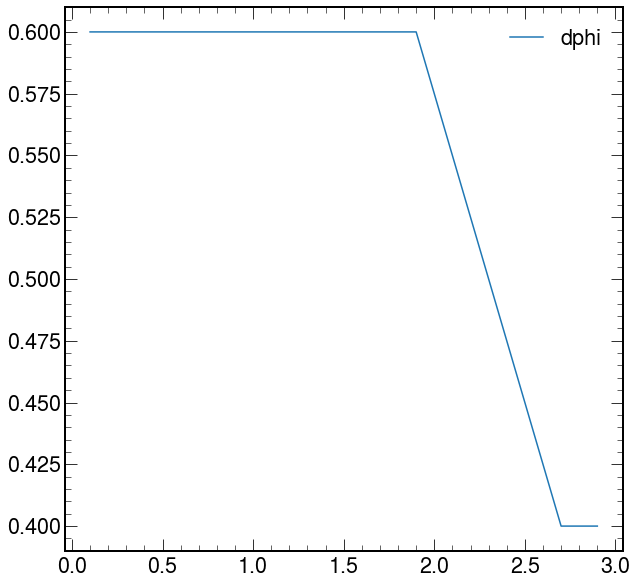

In [98]:
plt.plot(df.eta_bin, df.dphi_high, label="dphi")
plt.legend()

In [39]:
import ROOT as R

Welcome to JupyROOT 6.22/06


In [45]:
%jsroot on

In [83]:
c = R.TCanvas()
g = R.TGraph(len(df), df.eta_bin.values, df.deta_high.values)

g.Draw()
f = R.TF1("f","[0] + [1]*x + [2] *x^2")
f2 = R.TF1("f2","[0] + [1]*x")
g.Fit(f,"+", "", 0.1, 1.3)
g.Fit(f2,"+", "", 1.7, 1.9)
c.Draw()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  0.000357143
NDf                       =            4
Edm                       =  6.31346e-26
NCalls                    =           56
p0                        =    0.0758929   +/-   0.0111428   
p1                        =   -0.0178571   +/-   0.0371726   
p2                        =    0.0892857   +/-   0.0257746   

****************************************
Minimizer is Minuit / Migrad
Chi2                      =  1.41223e-26
NDf                       =            0
Edm                       =  2.82548e-26
NCalls                    =           36
p0                        =        0.625   +/-   12.7475     
p1                        =        -0.25   +/-   7.07107     


In [85]:
f.Eval(1.3)

0.20357142857132848

In [89]:
c = R.TCanvas()
g = R.TGraph(len(df), df.eta_bin.values, df.deta_low.values)

g.Draw()
f2 = R.TF1("f2","[0] + [1]*x")
g.Fit(f2,"+", "", 2.1, 2.5)
c.Draw()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  0.000104167
NDf                       =            1
Edm                       =  8.26073e-26
NCalls                    =           35
p0                        =     0.322917   +/-   0.083203    
p1                        =      -0.1875   +/-   0.0360844   


In [101]:
c = R.TCanvas()
g = R.TGraph(len(df), df.eta_bin.values, df.dphi_high.values)

g.Draw()
f2 = R.TF1("f2","[0] + [1]*x")
g.Fit(f2,"+", "", 1.9, 2.7)
c.Draw()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  3.93957e-25
NDf                       =            3
Edm                       =  7.87944e-25
NCalls                    =           34
p0                        =        1.075   +/-   1.32776e-12 
p1                        =        -0.25   +/-   5.72972e-13 


In [102]:
def dynamic_window(eta):
    aeta = abs(eta)

    if aeta >= 0 and aeta < 0.1:
        deta_up = 0.075
    if aeta >= 0.1 and aeta < 1.3:
        deta_up = 0.0758929 -0.0178571* aeta + 0.0892857*(aeta**2) 
    elif aeta >= 1.3 and aeta < 1.7:
        deta_up = 0.2
    elif aeta >=1.7 and aeta < 1.9:
        deta_up = 0.625 -0.25*aeta
    elif aeta >= 1.9:
        deta_up = 0.15

    if aeta < 2.1: 
        deta_down = -0.075
    elif aeta >= 2.1 and aeta < 2.5:
        deta_down = -0.1875 *aeta + 0.31875
    elif aeta >=2.5:
        deta_down = -0.15

    if aeta < 1.9:
        dphi = 0.6
    elif aeta >= 1.9 and aeta < 2.7:
        dphi = 1.075 -0.25 * aeta
    elif aeta >= 2.7:
        dphi = 0.4

    return deta_up, deta_down, dphi

In [106]:
a = np.linspace(0, 3, 50)

In [107]:
a

array([0.        , 0.06122449, 0.12244898, 0.18367347, 0.24489796,
       0.30612245, 0.36734694, 0.42857143, 0.48979592, 0.55102041,
       0.6122449 , 0.67346939, 0.73469388, 0.79591837, 0.85714286,
       0.91836735, 0.97959184, 1.04081633, 1.10204082, 1.16326531,
       1.2244898 , 1.28571429, 1.34693878, 1.40816327, 1.46938776,
       1.53061224, 1.59183673, 1.65306122, 1.71428571, 1.7755102 ,
       1.83673469, 1.89795918, 1.95918367, 2.02040816, 2.08163265,
       2.14285714, 2.20408163, 2.26530612, 2.32653061, 2.3877551 ,
       2.44897959, 2.51020408, 2.57142857, 2.63265306, 2.69387755,
       2.75510204, 2.81632653, 2.87755102, 2.93877551, 3.        ])

In [109]:
b = np.vectorize(dynamic_window)

In [111]:
deta_up,deta_down,dphi = b(a)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

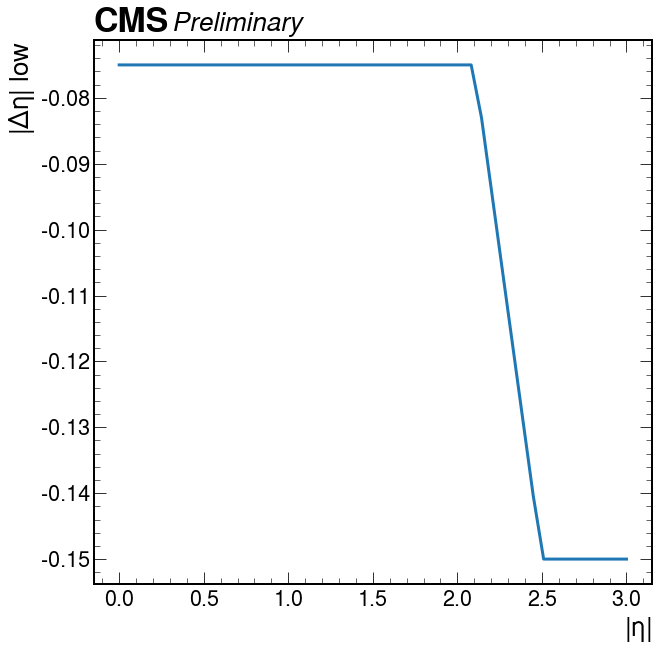

In [127]:
plt.plot(a, deta_down, linewidth=3)
plt.ylabel("$|\Delta\eta|$ low")
plt.xlabel("$|\eta|$")
hep.cms.text("Preliminary ",loc=0)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

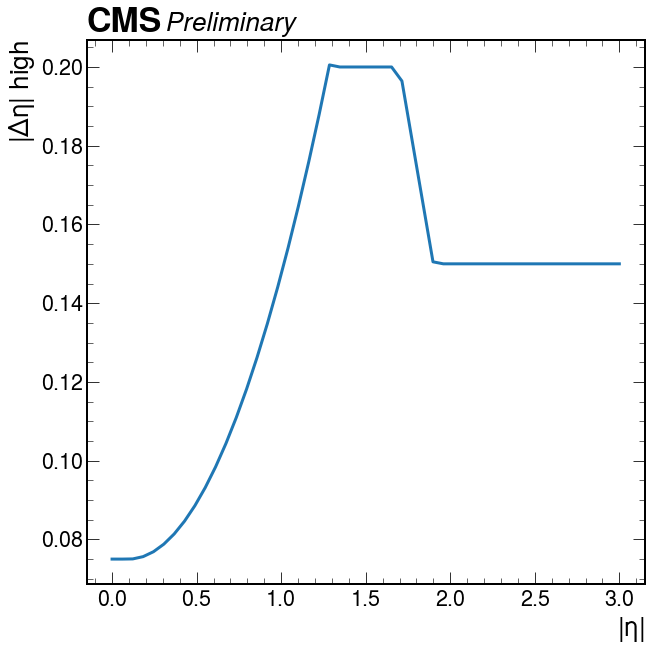

In [126]:
plt.plot(a, deta_up, linewidth=3)
plt.ylabel("$|\Delta\eta|$ high")
plt.xlabel("$|\eta|$")
hep.cms.text("Preliminary ",loc=0)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

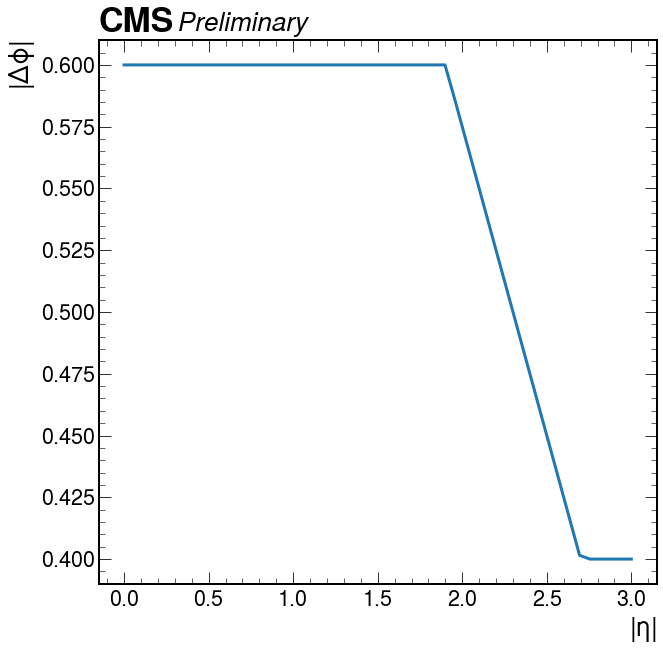

In [129]:
plt.plot(a, dphi, linewidth=3)
plt.ylabel("$|\Delta\phi|$")
plt.xlabel("$|\eta|$")
hep.cms.text("Preliminary ",loc=0)
